# Install these in your terminal 
!pip install pandas numpy scikit-learn nltk spacy matplotlib seaborn
!python -m nltk.downloader punkt stopwords
!python -m spacy download en_core_web_sm

Import Libraries

In [16]:
import pandas as pd
import numpy as np
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


Download NLTK Data and Load spaCy Model


In [17]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load spaCy model
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package punkt to /home/vashmeh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vashmeh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Create Sample Movie Review Dataset

In [18]:
# Sample dataset
data = {
    'review': [
        "I loved the movie! It was fantastic and thrilling.",
        "Absolutely terrible. I hated every minute.",
        "An excellent performance by the lead actor.",
        "The film was dull and boring. Waste of time.",
        "A brilliant script and great direction!",
        "Poorly written and badly acted.",
        "It was a wonderful experience!",
        "Disappointing. The plot was too predictable.",
        "Amazing visuals and a gripping storyline.",
        "I wouldn't recommend this movie to anyone."
    ],
    'sentiment': ['positive', 'negative', 'positive', 'negative', 'positive',
                  'negative', 'positive', 'negative', 'positive', 'negative']
}

df = pd.DataFrame(data)
df.head()


,review,sentiment
0,I loved the movie! It was fantastic and thrill...,positive
1,Absolutely terrible. I hated every minute.,negative
2,An excellent performance by the lead actor.,positive
3,The film was dull and boring. Waste of time.,negative
4,A brilliant script and great direction!,positive


Preprocess Text (Lowercase, Remove Stopwords, Lemmatize)

In [19]:
def preprocess_text(text):
    # Lowercase and tokenize
    tokens = word_tokenize(text.lower())
    # Remove punctuation
    tokens = [t for t in tokens if t not in string.punctuation]
    # Remove stopwords
    tokens = [t for t in tokens if t not in stop_words]
    # Lemmatize using spaCy
    doc = nlp(' '.join(tokens))
    lemmatized = [token.lemma_ for token in doc]
    return ' '.join(lemmatized)

# Apply to dataset
df['cleaned_review'] = df['review'].apply(preprocess_text)
df.head()


,review,sentiment,cleaned_review
0,I loved the movie! It was fantastic and thrill...,positive,love movie fantastic thrilling
1,Absolutely terrible. I hated every minute.,negative,absolutely terrible hate every minute
2,An excellent performance by the lead actor.,positive,excellent performance lead actor
3,The film was dull and boring. Waste of time.,negative,film dull boring waste time
4,A brilliant script and great direction!,positive,brilliant script great direction


Feature Extraction Using CountVectorizer

In [20]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_review'])


Encode Target and Split Data


In [21]:
y = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


Train Logistic Regression Classifier

In [22]:
clf = LogisticRegression()
clf.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Evaluate Model

In [23]:
y_pred = clf.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

Confusion Matrix:

[[0 2]
 [0 1]]

Accuracy Score: 0.3333333333333333


/home/vashmeh/Documents/test/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vashmeh/Documents/test/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vashmeh/Documents/test/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

Visualize Confusion Matrix

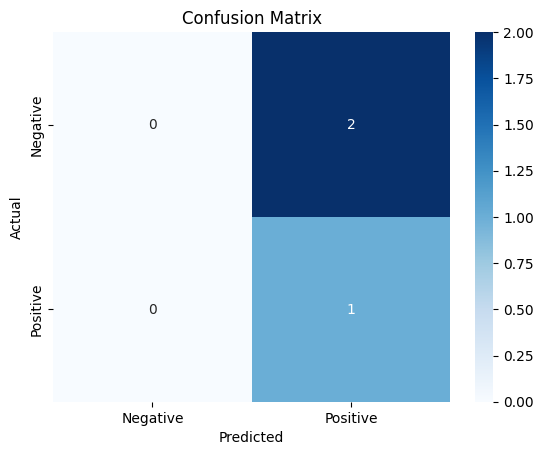

In [24]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Predict Sentiment for New Review

In [25]:
def predict_sentiment(text):
    cleaned = preprocess_text(text)
    vector = vectorizer.transform([cleaned])
    prediction = clf.predict(vector)[0]
    return 'positive' if prediction == 1 else 'negative'


Try Your Own Review

In [26]:
test_review = "The movie was a masterpiece with brilliant acting!"
print(f"Review: {test_review}")
print(f"Predicted Sentiment: {predict_sentiment(test_review)}")


Review: The movie was a masterpiece with brilliant acting!
Predicted Sentiment: positive
